<a href="https://colab.research.google.com/github/ashika69/demopygit/blob/main/ConcreteStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from scipy.stats import probplot

**DATA LOADING**

In [ ]:
concrete = pd.read_csv("/content/concrete_data.csv")

In [ ]:
concrete.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Renaming the feature**

In [ ]:
concrete.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

In [ ]:
concrete

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


**DATA ANALYSIS AND VISUALIZATION**

In [ ]:
concrete.shape

(1030, 9)

In [ ]:
concrete.isnull().sum()

cement              0
blastFurnace        0
flyAsh              0
water               0
superplasticizer    0
courseAggregate     0
fineaggregate       0
age                 0
strength            0
dtype: int64

In [ ]:
concrete.duplicated().sum()

25

THERE ARE 25 DULICATES ...**DROP THE DUPLICATES**

In [ ]:
concrete.drop_duplicates()

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   blastFurnace      1030 non-null   float64
 2   flyAsh            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   courseAggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
concrete.describe()

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**DATA PREPROCESSING --- EDA**

EXPLORITORY DATA ANALYSIS

In [ ]:
corr = concrete.corr()

<Axes: >

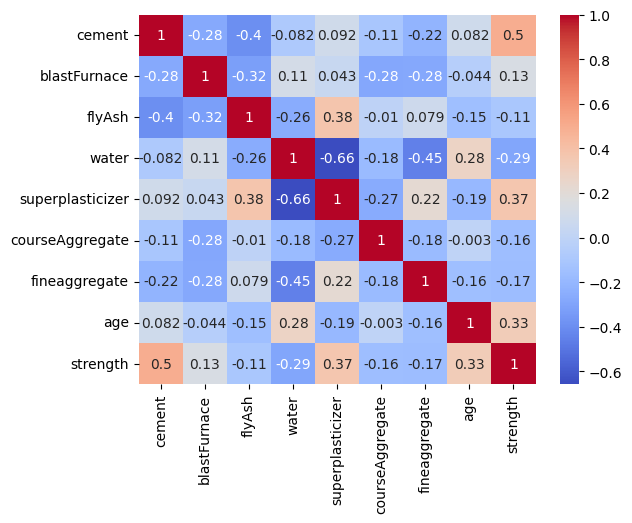

In [ ]:
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

<ipython-input-49-e783c1899b5a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concrete.strength)


<Axes: xlabel='strength', ylabel='Density'>

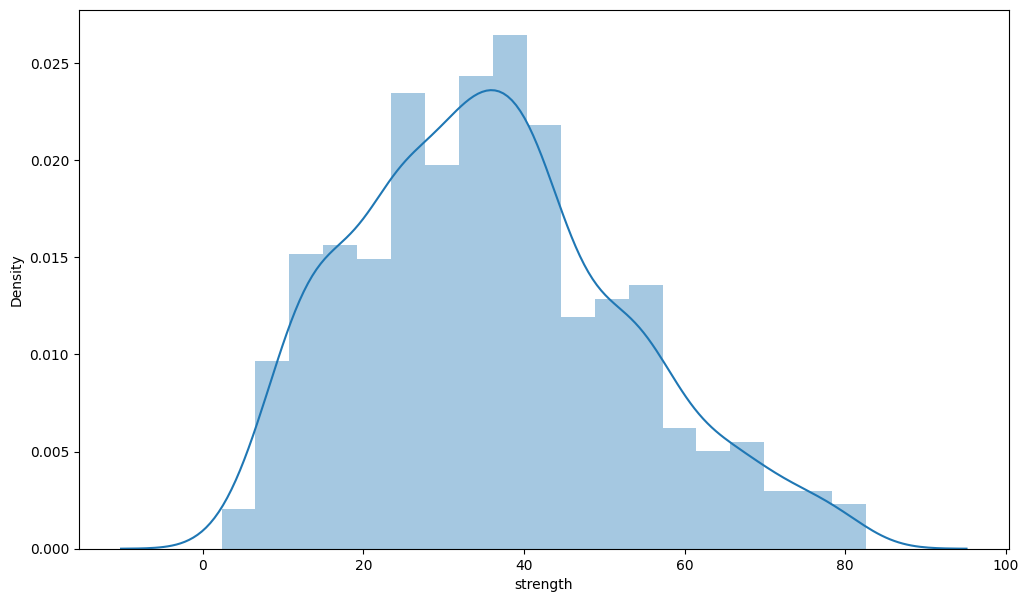

In [ ]:
#Distribution of the target variable or dependent feature  <--- univariant analysis
plt.figure(figsize=(12,7))
sns.distplot(concrete.strength)

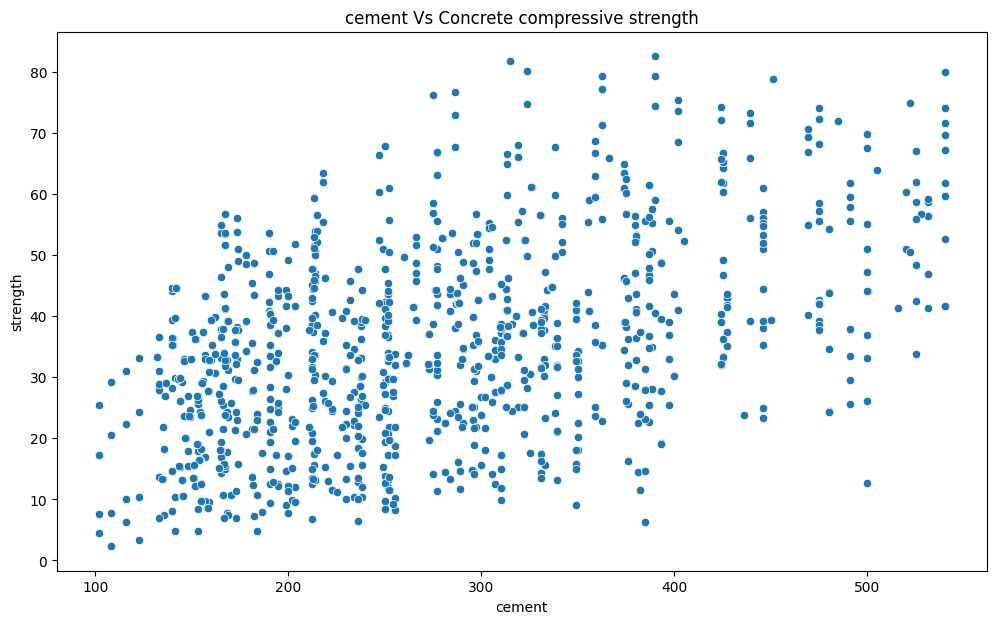

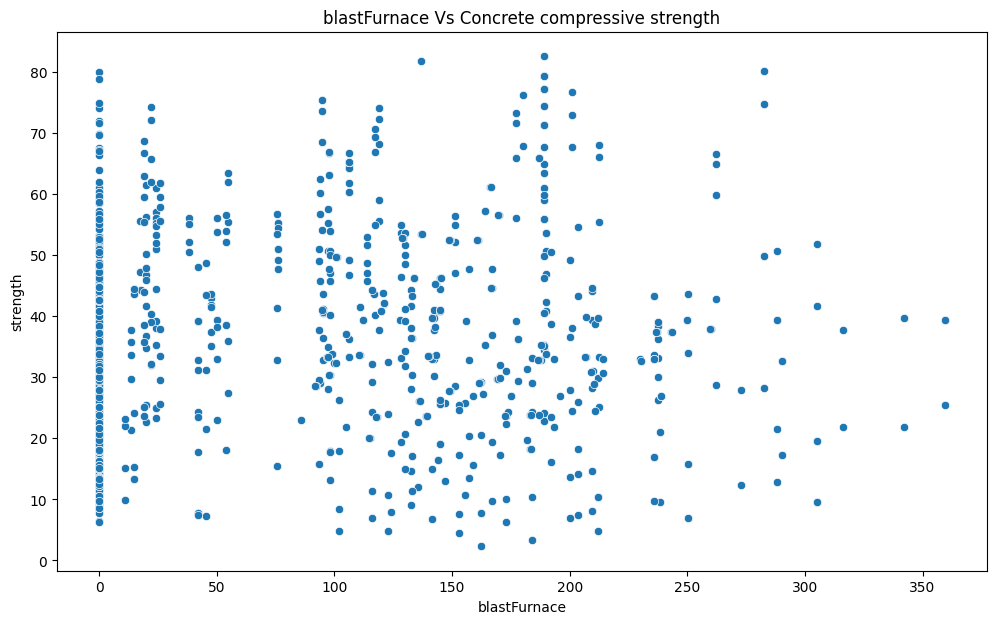

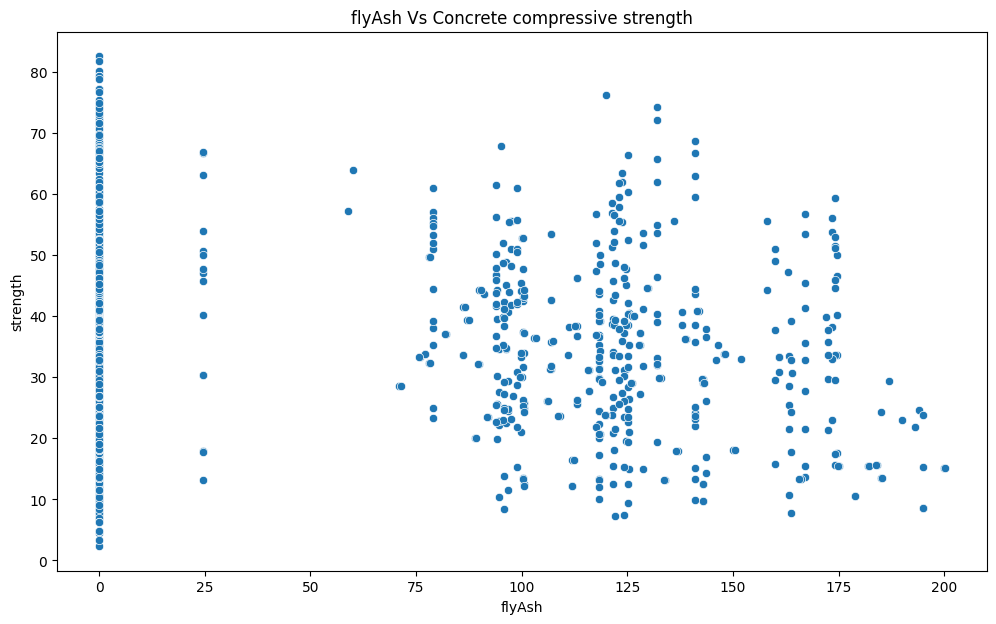

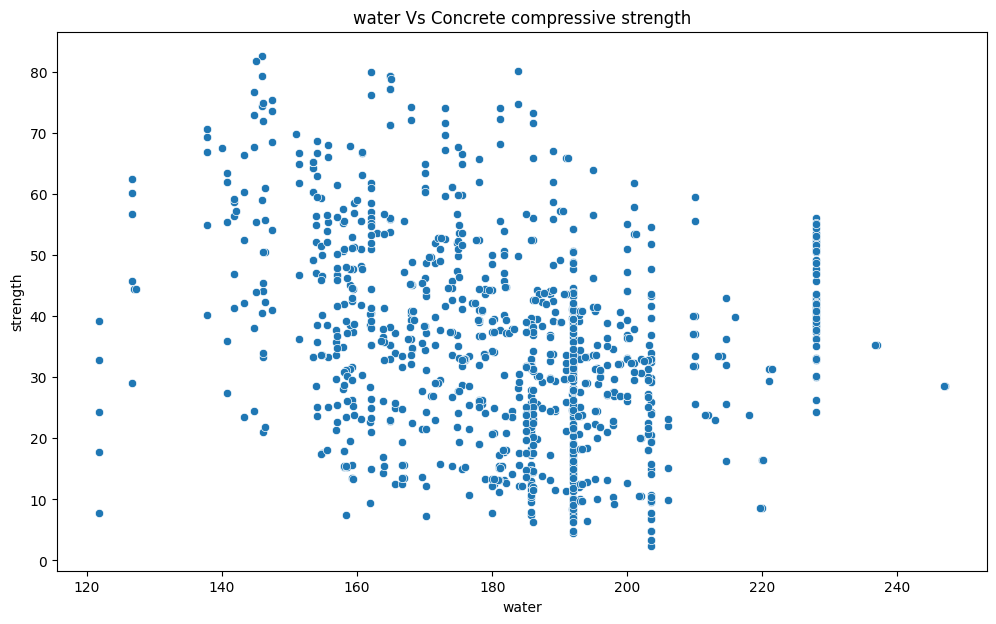

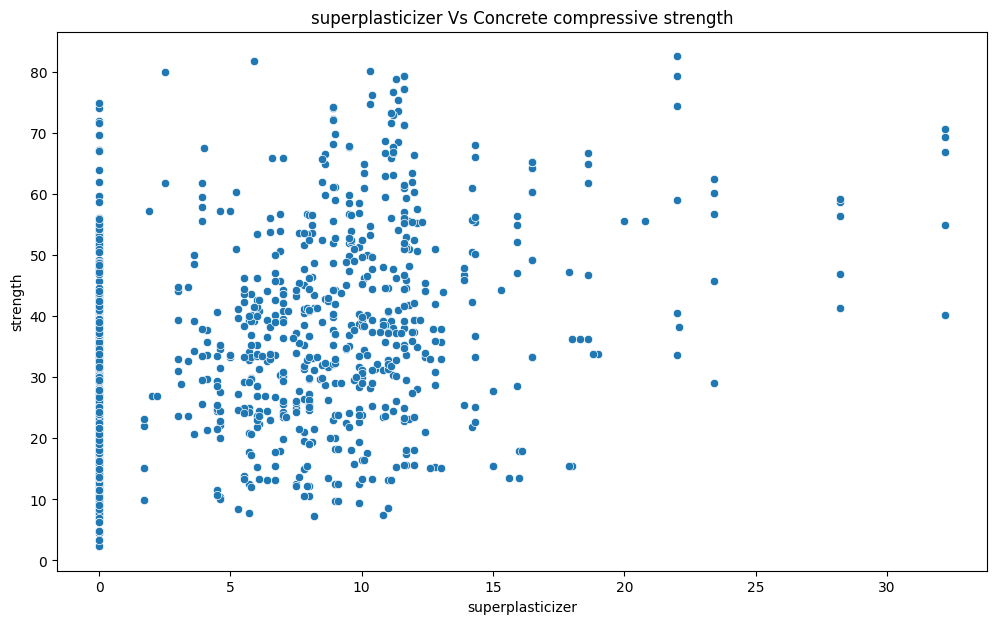

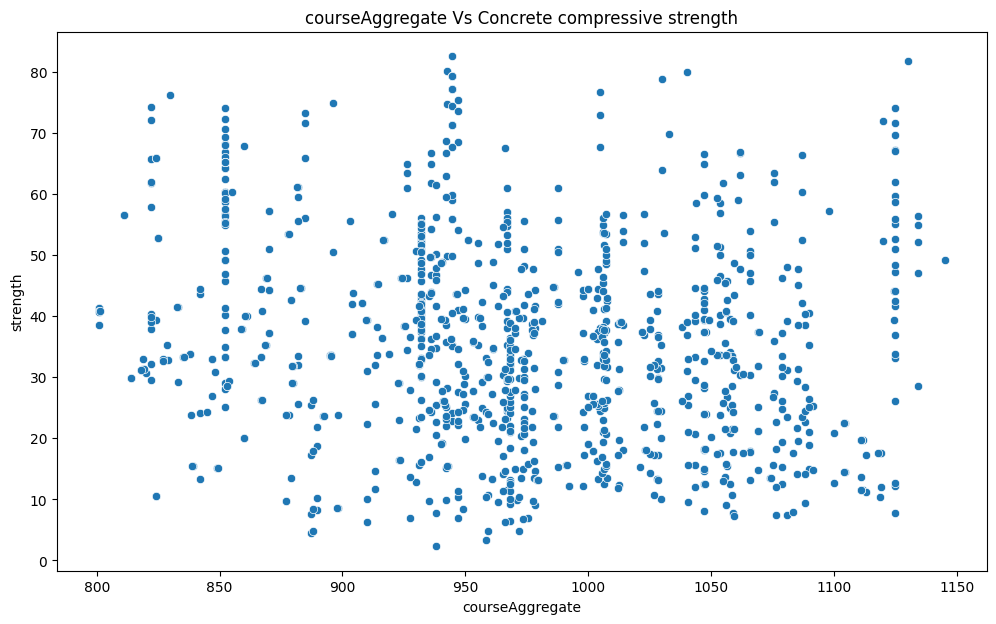

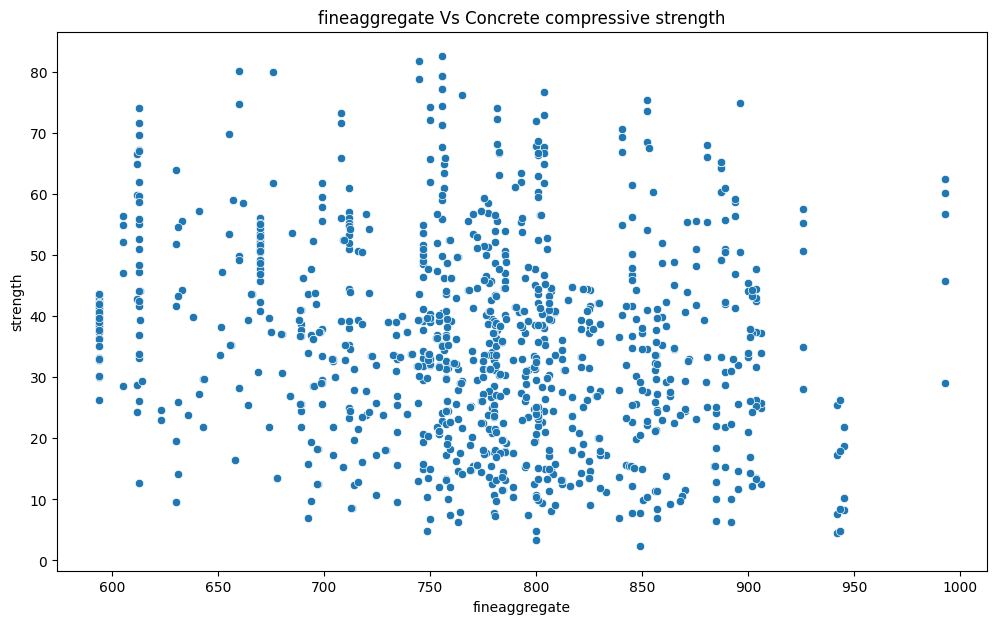

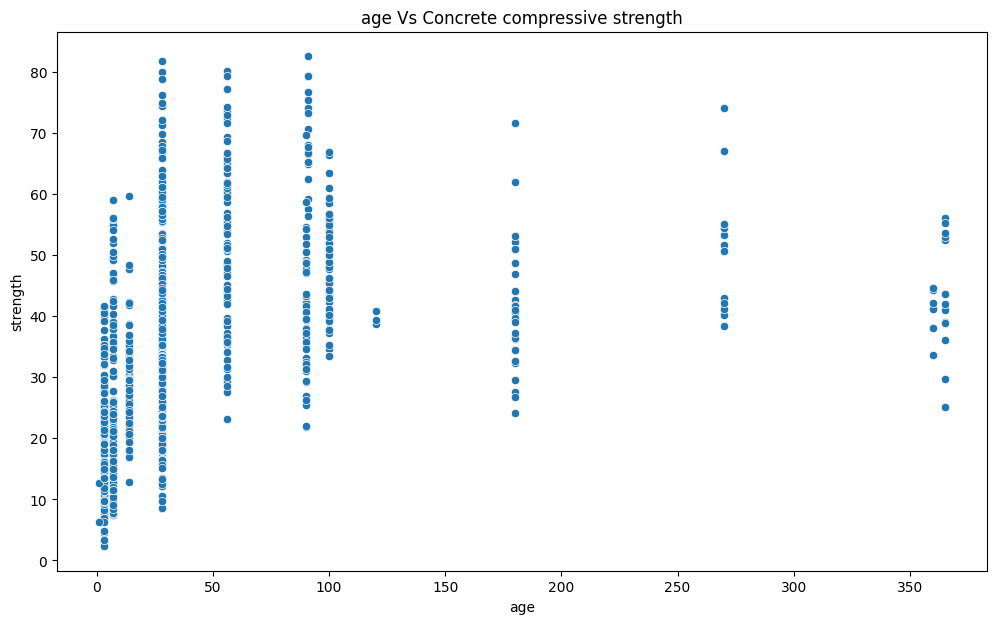

In [ ]:
#Independent features(input variable) Vs dependent feature(output variable ) - Data Visualization
for i in concrete.columns:
    if i != 'strength':
        plt.figure(figsize=(12,7))
        plt.title(i+' '+'Vs Concrete compressive strength')
        sns.scatterplot(x = concrete[i],y=concrete.strength)

In [ ]:
# Split the data into features and target
from sklearn.model_selection import train_test_split
X = concrete.drop("strength", axis=1)
y = concrete["strength"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-52-d25947e4f26d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


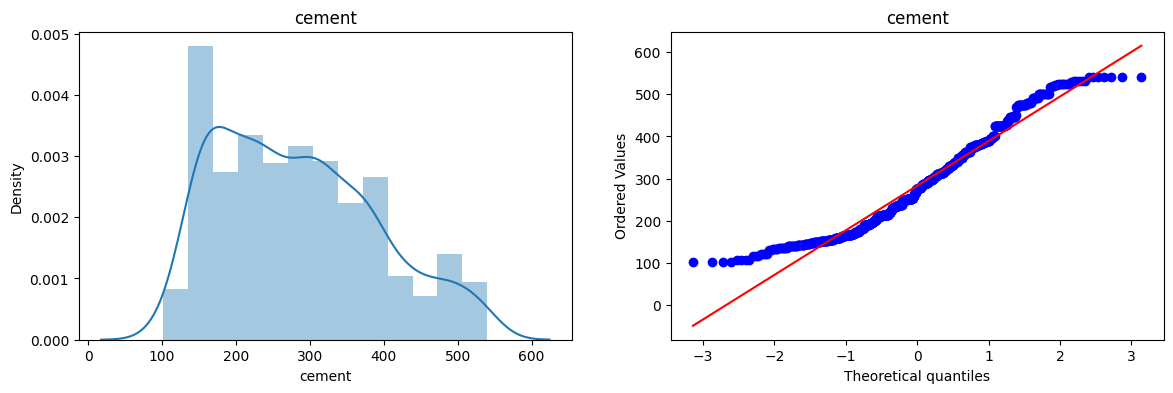

<ipython-input-52-d25947e4f26d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


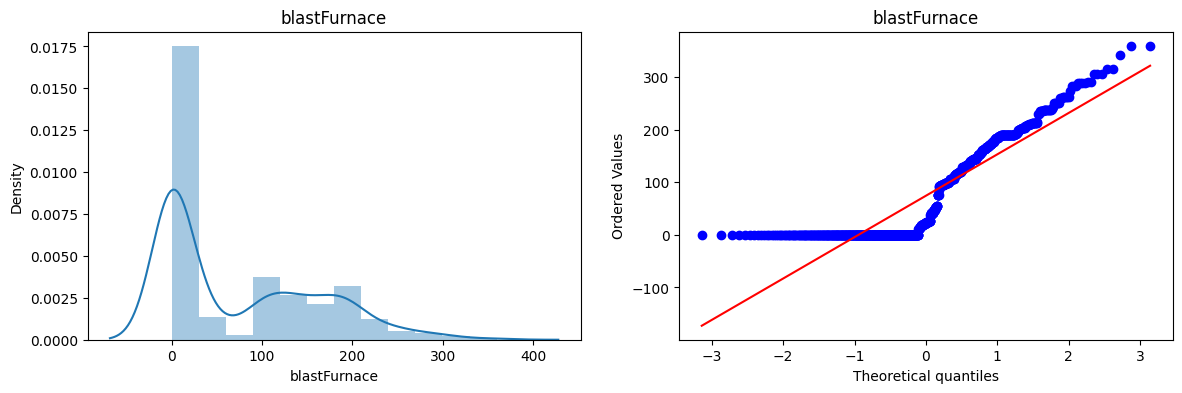

<ipython-input-52-d25947e4f26d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


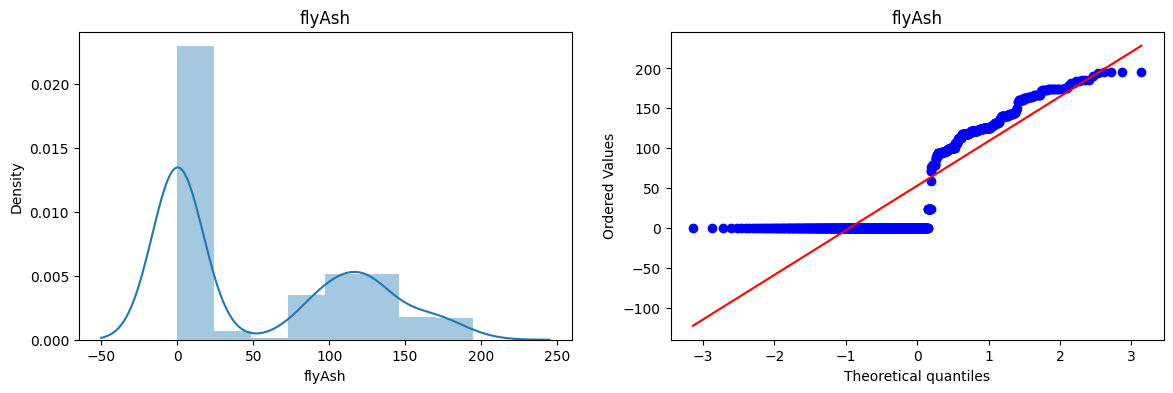

<ipython-input-52-d25947e4f26d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


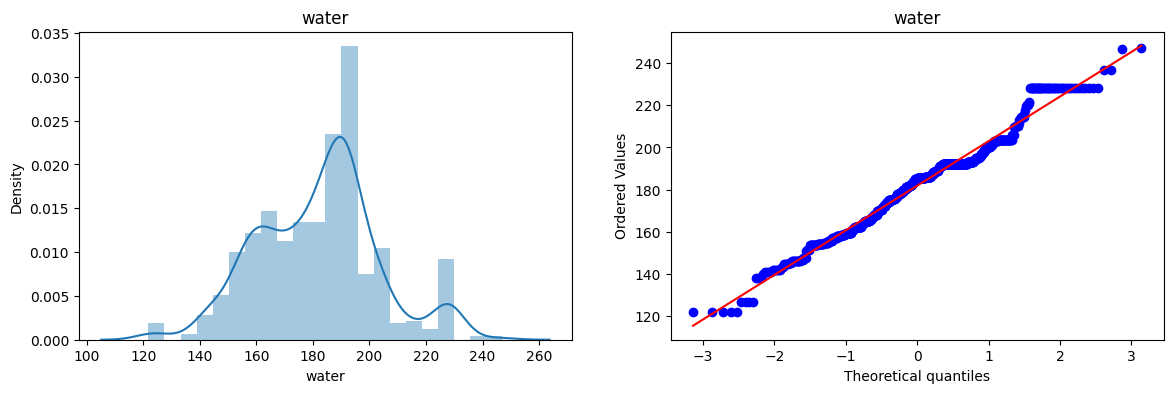

<ipython-input-52-d25947e4f26d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


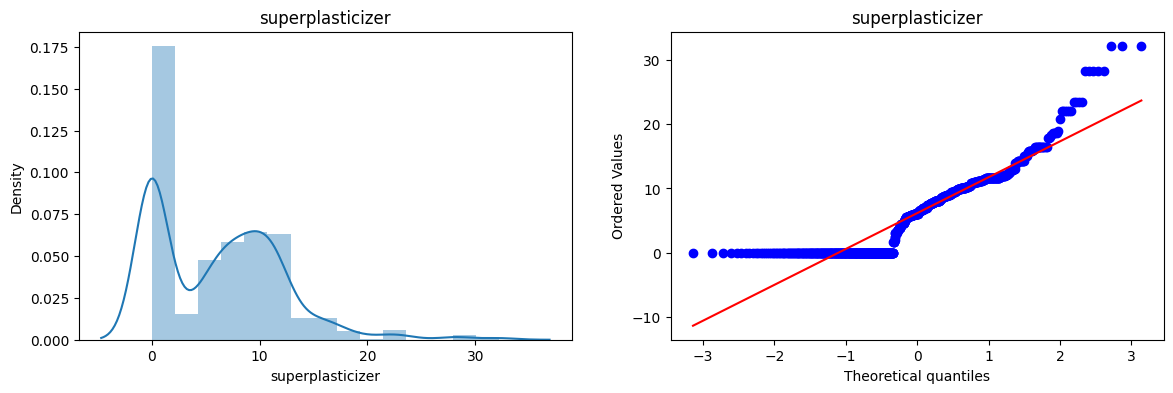

<ipython-input-52-d25947e4f26d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


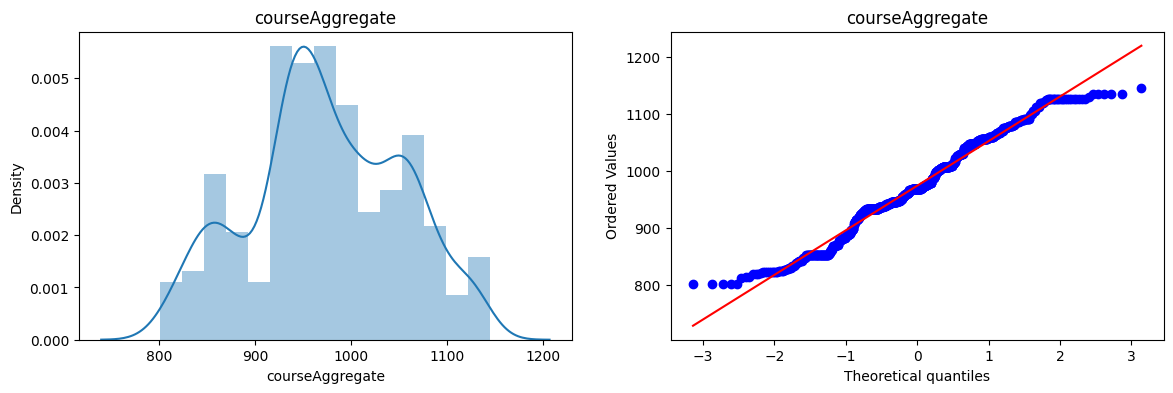

<ipython-input-52-d25947e4f26d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


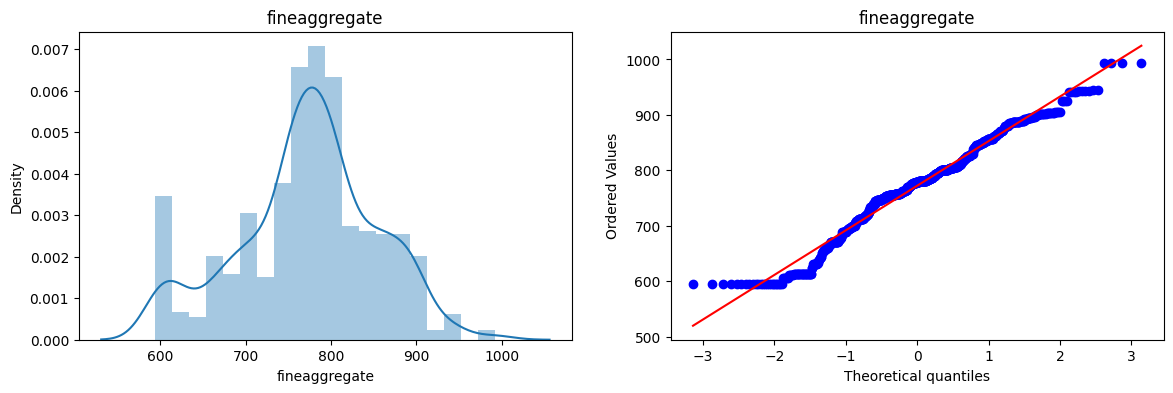

<ipython-input-52-d25947e4f26d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


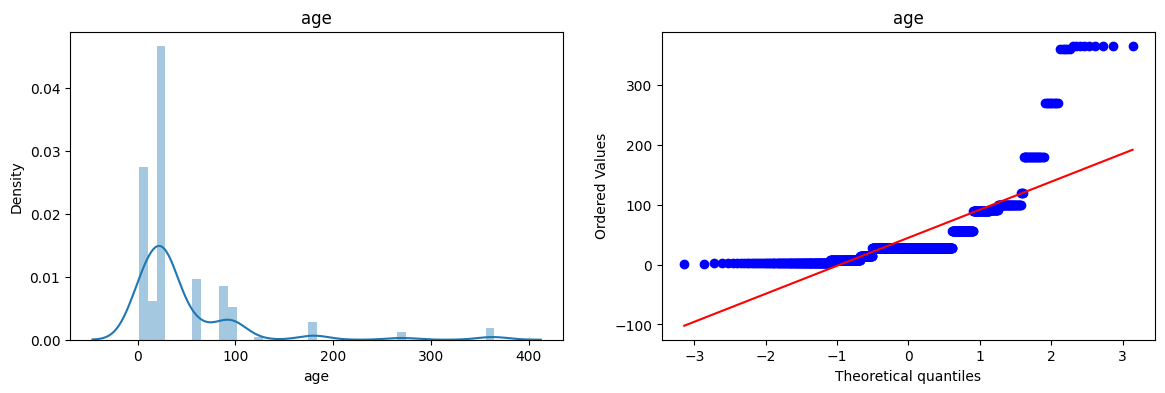

In [ ]:
# input_features (input)
for col in X_train.columns:
    plt.figure(figsize=(14, 4))

    # Subplot 1: Distribution plot
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    # Subplot 2: QQ plot
    #If the two distributions that we are comparing are exactly equal, then the points on the Q-Q plot will perfectly lie on a straight line y = x.
    plt.subplot(122)
    probplot(X_train[col], dist='norm', plot=plt)
    plt.title(col)
    plt.show()

**APPLY POWER TRANSFORM **


        What is powertransfomer in machine learning?

Ans:

Power transformation is a family of data transformations that are applied to make the data more Gaussian-like or more symmetric. This can be useful for certain statistical methods that assume normally distributed data, such as linear regression.

Types:

Yeo-Johnson & Box-Cox

is a generalization of Box-Cox that allows for transformation of both positive and negative values. PowerTransformer can be used as a preprocessing step in a machine learning pipeline to improve the performance of models that are sensitive to the distribution of the data.

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox') # by heo johnson

The Box-Cox transformation is a method used to transform non-normal data into a normal distribution.

In [ ]:
X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transoformed = pt.transform(X_test+0.000001)

<ipython-input-55-f9c701bded7c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-55-f9c701bded7c>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


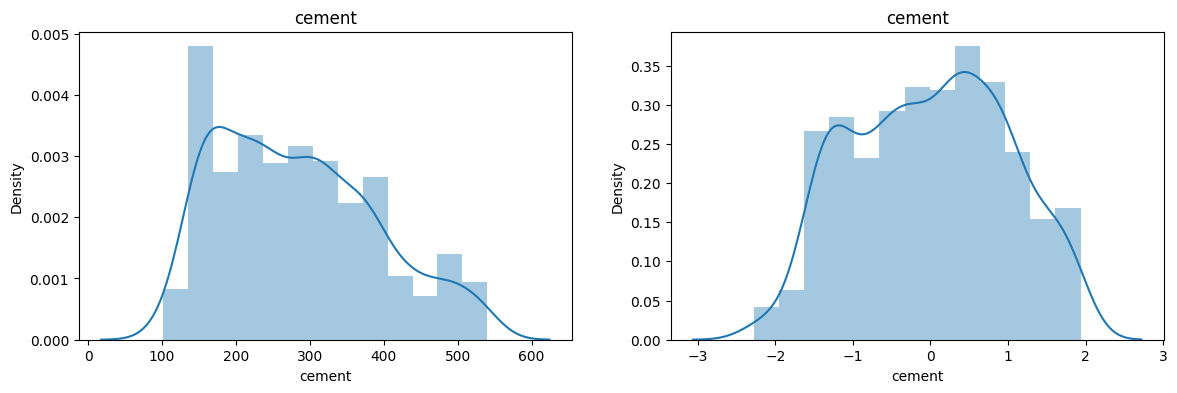

<ipython-input-55-f9c701bded7c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-55-f9c701bded7c>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


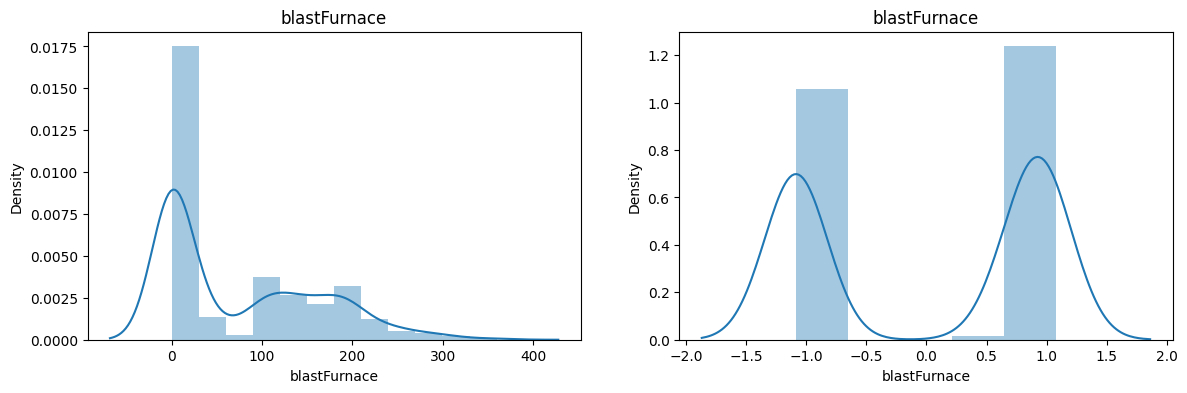

<ipython-input-55-f9c701bded7c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-55-f9c701bded7c>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


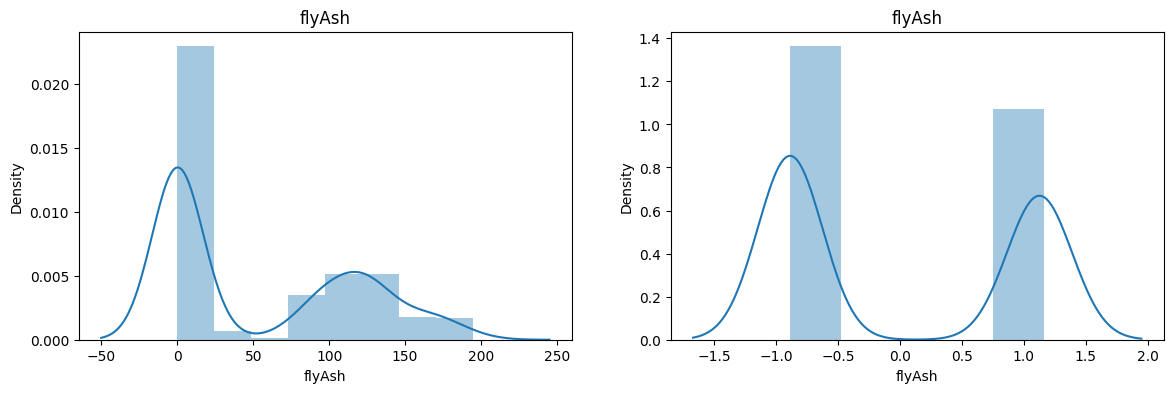

<ipython-input-55-f9c701bded7c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-55-f9c701bded7c>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


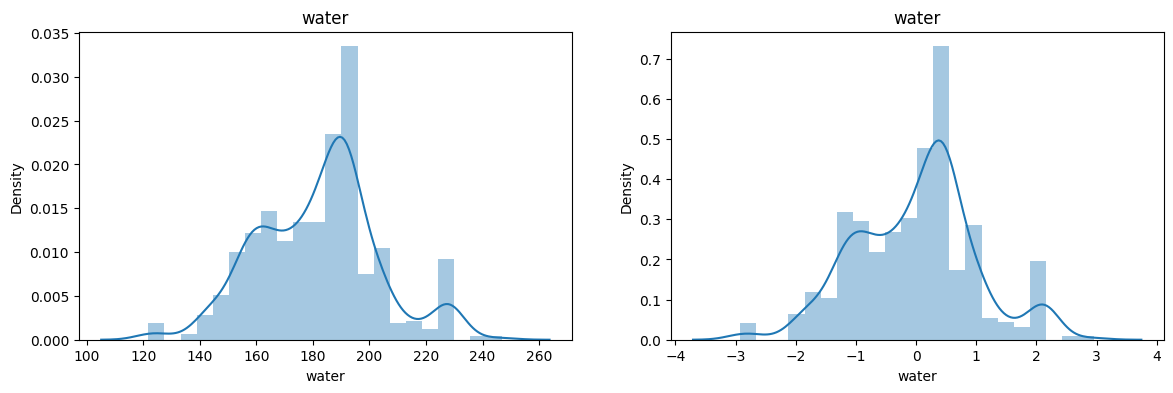

<ipython-input-55-f9c701bded7c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-55-f9c701bded7c>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


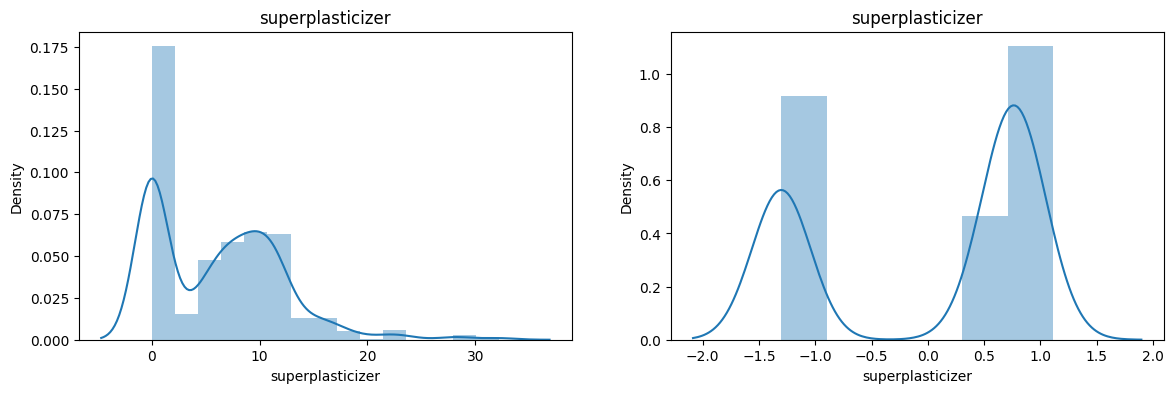

<ipython-input-55-f9c701bded7c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-55-f9c701bded7c>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


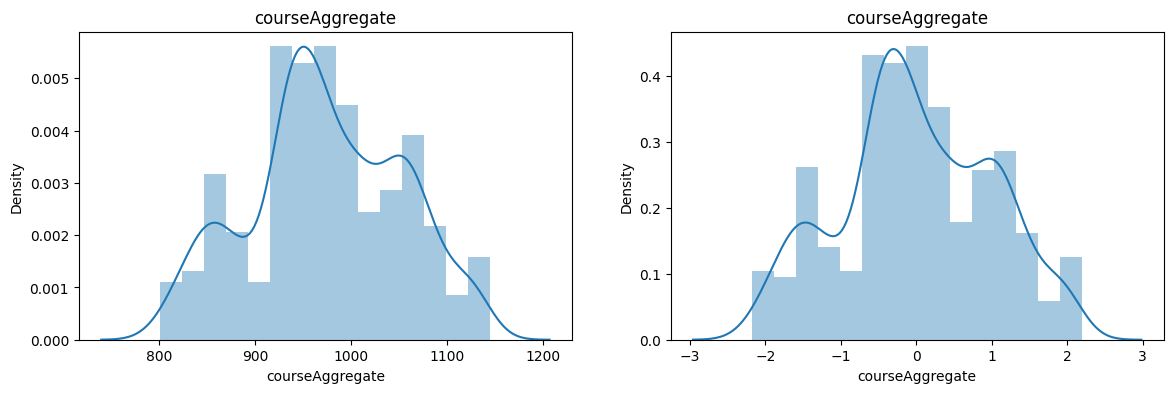

<ipython-input-55-f9c701bded7c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-55-f9c701bded7c>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


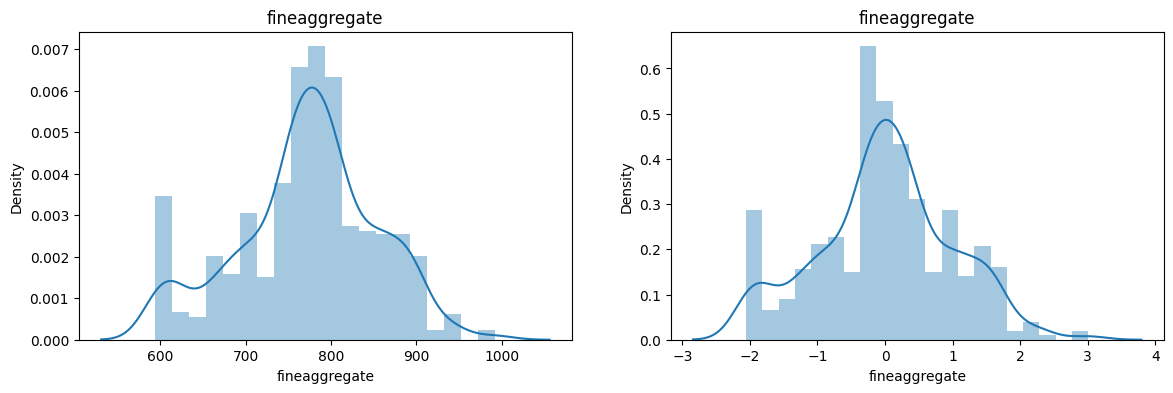

<ipython-input-55-f9c701bded7c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
<ipython-input-55-f9c701bded7c>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


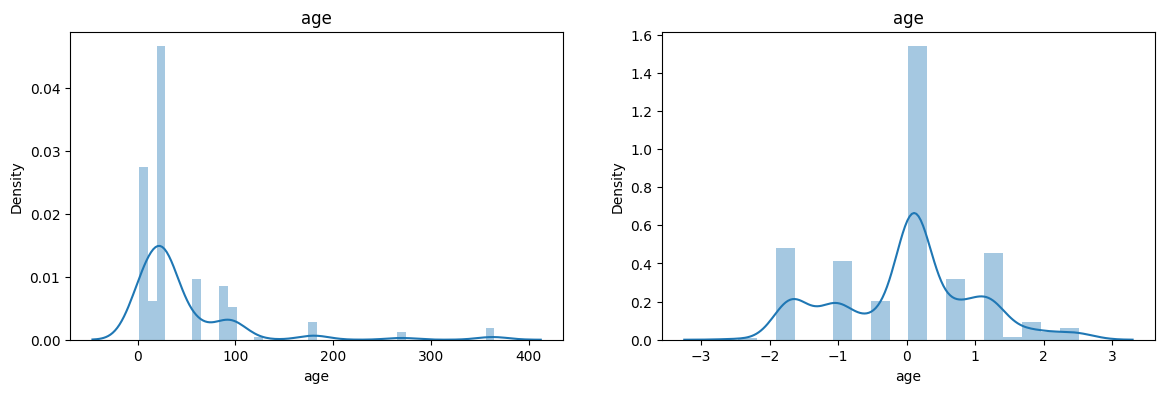

In [ ]:
# input_features (input)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)



#     # QQ plot
    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)
    plt.show()

**Scaling (Standard Scalar)**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_transformed = scaler.transform(X_train)
X_test_transoformed = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score


# Define the regression models
models = {
    'lin_reg': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'rf_reg': RandomForestRegressor(n_estimators=100, random_state=42),
    'xgb_reg': XGBRegressor(),

}




for name ,model in models.items():
    model.fit(X_train_transformed,y_train)
    y_pred = model.predict(X_test_transoformed)

    print(f"{name} : {r2_score(y_test,y_pred)}")


lin_reg : 0.627553179231485
ridge : 0.6275758154536217
lasso : 0.5639167892352364
rf_reg : 0.8841688335094583
xgb_reg : 0.9176563827108167


In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train_transformed,y_train)
y_pred = xgb.predict(X_test_transoformed)
r2_score(y_test,y_pred)

0.9176563827108167

In [ ]:
def predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age):
    features = np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    prediction = xgb.predict(features).reshape(1,-1)

    return prediction[0]

In [ ]:
cem = 540.0
blastf = 0.0
flyas = 0.0
water = 162.0
superplaster = 2.5
courseagg = 1040.0
fineagg = 676.0
age = 28

prediction = predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age)
print("strength is : ",prediction)

strength is :  [43.131172]


**USING XGBOOSTER MODEL WITH CROSS VAILDATION**

---

CROSS VAILDATION HELPS IN INCREASING THE ACCURANCY

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor()
parameters = {                                                    # Specifies the hyperparameter grid for tuning.
          'learning_rate': [0.1,0.2,0.5,0.8,1],
          'max_depth': [2,3,4,5,6,7,8,10],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'min_child_weight': [1,2,4,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8,10,50,100],
          'reg_lambda': [1,4,5,10,20,50,100,200,500,800,1000]
}
xgcv = RandomizedSearchCV(estimator=xgb , param_distributions=parameters ,cv=10 , scoring='r2',n_jobs=-1)   #RandomizedSearchCV with XGBoostRegressor as the estimator, the hyperparameter grid defined by parameters, 10-fold cross-validation (cv=10), 'r2' scoring, and using all available CPU cores (n_jobs=-1).
xgcv.fit(X_train , y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1090, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
 

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7, 1.0,
                                                             1.4],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                                        'min_child_weight': [1, 2, 4, 5, 8],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.5,
                                                      0.7, 0.9, 1, 4, 8, 10, 50,
                                                      100],
                                        'reg_lambda': [1, 4, 5, 10, 20, 50, 100,
                                                       200, 500, 800, 1000],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.4, 0.9, 1]},
                   scoring='r2')

In [ ]:
xgcv.best_params_ # best prarameters

{'subsample': 0.9,
 'reg_lambda': 100,
 'reg_alpha': 0.1,
 'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.5,
 'gamma': 0.2,
 'colsample_bytree': 1.0}

In [ ]:
xgcv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgcv.best_score_

0.9210163706283587

In [ ]:
xgb_reg = xgcv.best_estimator_ # model with hyperparamter tuning

In [ ]:
xgb_reg.fit(X_train ,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# prediction on test data
y_pred_xg = xgb_reg.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_xg)

0.9250679465638071

In [ ]:
# training data
y_pred_train = xgb_reg.predict(X_train)

In [ ]:
r2_score(y_train , y_pred_train)

0.9835266195901431

**selecting best model**

In [ ]:
def predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age):
    features = np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    prediction = xgb_reg.predict(features).reshape(1,-1)

    return prediction[0]

In [ ]:
X_train

,cement,blastFurnace,flyAsh,water,superplasticizer,courseAggregate,fineaggregate,age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [ ]:
cem = 315.0
blastf = 0.0
flyas = 0.0
water = 157.6
superplaster = 3.465
courseagg = 1100.0
fineagg = 821.0
age = 7

prediction = predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age)
print("strength is : ",prediction)

strength is :  [28.45818]


In [ ]:
def predict_concrete_strength_category(prediction):
    if 10<= prediction <= 30:
        return "Low Strength Concrete"
    elif 30 <= prediction <= 50:
        return "Medium Strength Concrete"
    elif 50 <= prediction <= 100:
        return "High Strength Concrete"
    else:
        return "Ultra High Strength Concrete"


# Predict category for each strength
strength_categories = [predict_concrete_strength_category(strength) for strength in prediction]

# Print the predicted categories
for i, category in enumerate(strength_categories):
    print(f"Predicted Strength: {prediction[i]} MPa, Category: {category}")

Predicted Strength: 28.458179473876953 MPa, Category: Low Strength Concrete
